# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [5]:
#!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
#!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
#!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Для начала загрузим выборки: 'train.csv', 'test.csv'

In [4]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

# Первичный анализ данных

Посмотрим на наши данные, возьмем любые 10 строк

In [5]:
display(data_train.sample(10))
data_train.shape

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3871,9,65.60,593.3,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,0
3010,31,20.45,638.55,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4173,72,66.50,4811.6,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),0
350,31,71.05,2168.15,Male,0,No,No,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,0
1058,32,87.65,2766.4,Male,0,No,No,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),0
2412,40,63.90,2635,Female,0,Yes,No,Yes,Yes,DSL,No,Yes,No,No,Yes,No,One year,No,Bank transfer (automatic),0
1949,53,80.60,4348.1,Male,0,No,No,Yes,No,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,0
1448,9,45.40,418.8,Male,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4364,34,67.65,2339.3,Female,0,No,Yes,Yes,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0
5193,7,59.50,415.95,Female,0,No,No,Yes,No,DSL,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,1


(5282, 20)

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
data_train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пропусков не обнаружено

In [8]:
data_train.describe(include='all')

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
count,5282.000000,5282.000000,5282,5282,5282.000000,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282.000000
unique,NaN,NaN,4978,2,NaN,2,2,2,3,3,3,3,3,3,3,3,3,2,4,NaN
top,NaN,NaN,,Male,NaN,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN
freq,NaN,NaN,9,2655,NaN,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786,NaN
mean,32.397009,64.924754,NaN,NaN,0.159409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.262022
std,24.550326,30.176464,NaN,NaN,0.366092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.439776
min,0.000000,18.250000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,9.000000,35.462500,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,29.000000,70.400000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,55.000000,90.050000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


Численные признаки имеют разный масштаб, это тоже исправим далее.

Теперь посмотрим на тестовую выборку

In [9]:
display(data_test.shape)
display(data_test.sample(5))
display(data_test.info())
display(data_test.isna().sum())

(1761, 19)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
741,4,45.65,191.05,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check
1735,22,85.35,1961.6,Female,1,Yes,Yes,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic)
218,28,59.55,1646.45,Female,0,No,No,Yes,No,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
834,70,97.65,6982.5,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check
1355,2,73.55,145.4,Female,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

None

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

Также нет никаких пропусков

In [10]:
print(sum(data_train['TotalSpent'].unique() == ' '))
print(sum(data_test['TotalSpent'].unique() == ' '))

1
1


Заполним пропуски медианой

In [11]:
data_train['TotalSpent'] = pd.to_numeric(data_train['TotalSpent'], errors='coerce')
data_test['TotalSpent'] = pd.to_numeric(data_test['TotalSpent'], errors='coerce')

In [12]:
display(data_train.info())
display(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1759 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

None

In [13]:
train_median = data_train['TotalSpent'].median()
data_train['TotalSpent'] = data_train['TotalSpent'].fillna(value=train_median)
data_test['TotalSpent'] = data_test['TotalSpent'].fillna(value=train_median)

display(data_train.info())
display(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

None

# Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Построим гистограммы и посмотрим на них

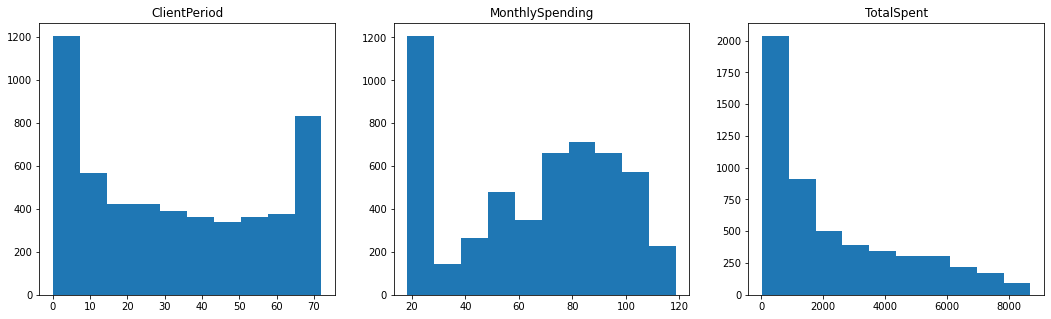

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(18,5))
for i, col in enumerate(num_cols):
    ax[i].hist(data_train[col])
    ax[i].set_title(col)

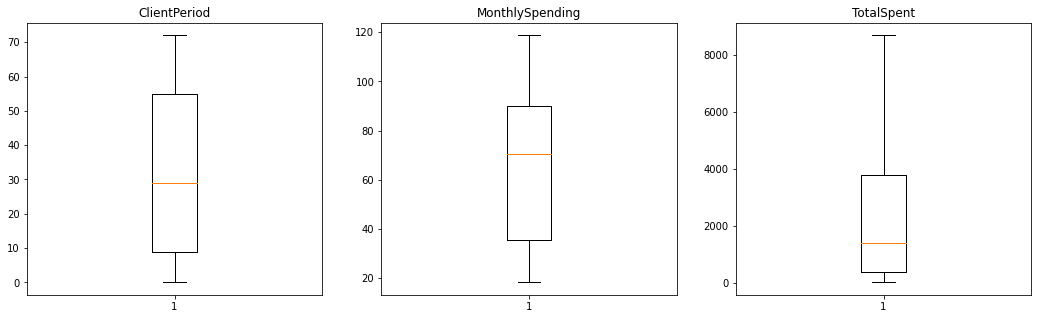

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(18,5))
for i, col in enumerate(num_cols):
    ax[i].boxplot(data_train[col])
    ax[i].set_title(col)

Выбросов не наблюдается, у признаков большие хвосты.

Теперь разберемся с категориальными признаками

Признак: Sex
unique values ['Male' 'Female']


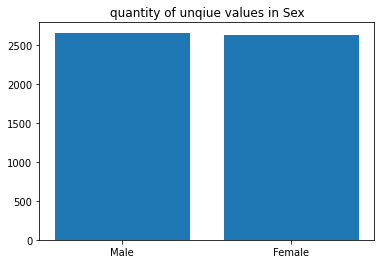

Признак: IsSeniorCitizen
unique values [0 1]


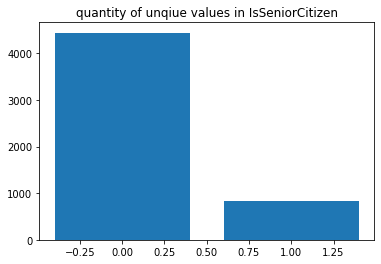

Признак: HasPartner
unique values ['Yes' 'No']


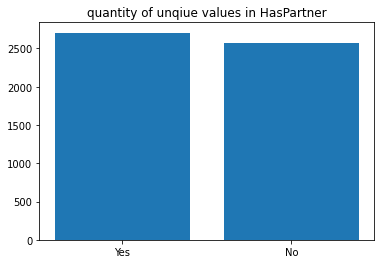

Признак: HasChild
unique values ['Yes' 'No']


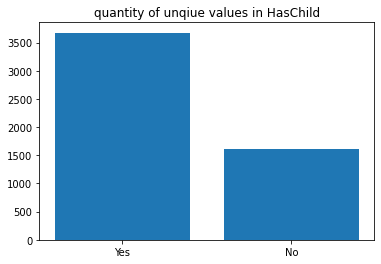

Признак: HasPhoneService
unique values ['Yes' 'No']


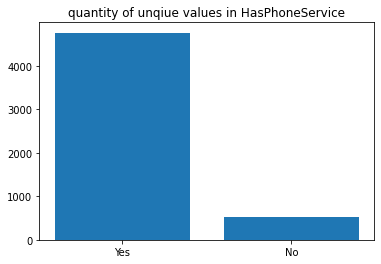

Признак: HasMultiplePhoneNumbers
unique values ['No' 'Yes' 'No phone service']


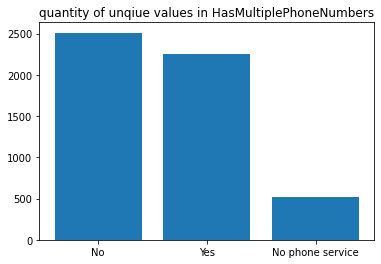

Признак: HasInternetService
unique values ['No' 'Fiber optic' 'DSL']


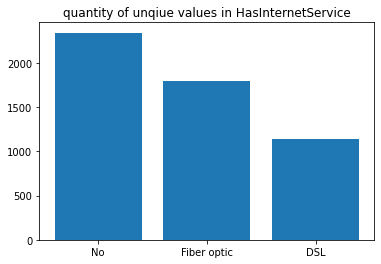

Признак: HasOnlineSecurityService
unique values ['No internet service' 'No' 'Yes']


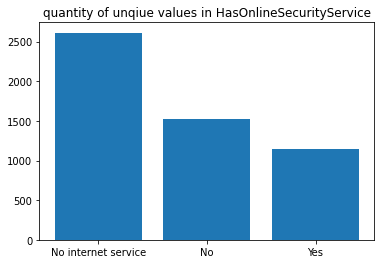

Признак: HasOnlineBackup
unique values ['No internet service' 'No' 'Yes']


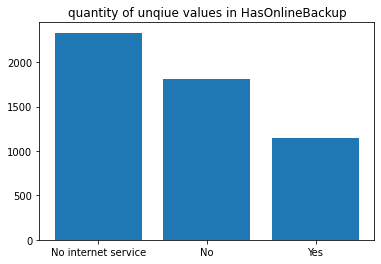

Признак: HasDeviceProtection
unique values ['No internet service' 'No' 'Yes']


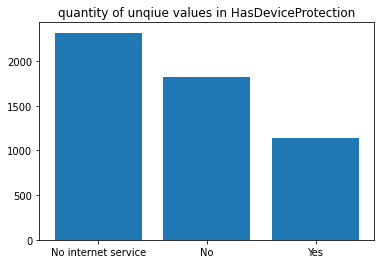

Признак: HasTechSupportAccess
unique values ['No internet service' 'Yes' 'No']


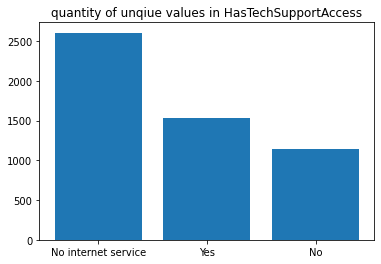

Признак: HasOnlineTV
unique values ['No internet service' 'No' 'Yes']


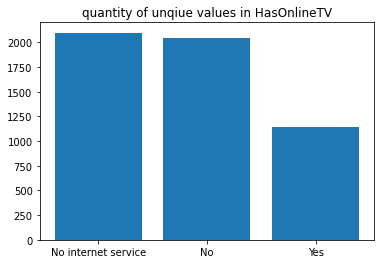

Признак: HasMovieSubscription
unique values ['No internet service' 'No' 'Yes']


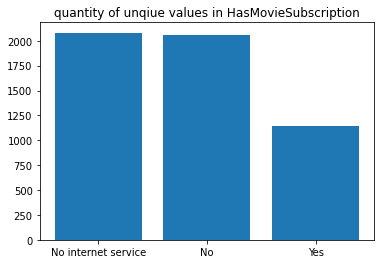

Признак: HasContractPhone
unique values ['One year' 'Two year' 'Month-to-month']


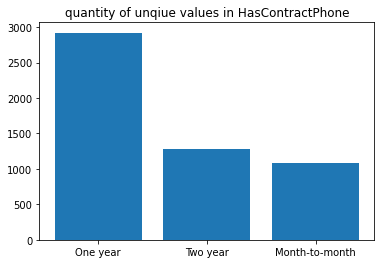

Признак: IsBillingPaperless
unique values ['No' 'Yes']


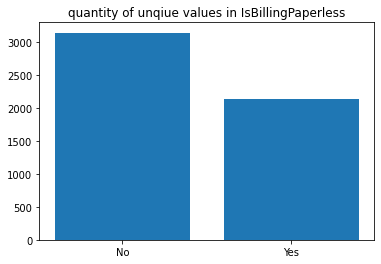

Признак: PaymentMethod
unique values ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']


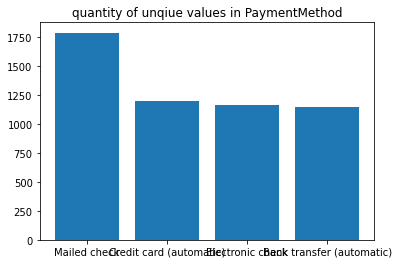

In [8]:
for col in cat_cols:
    print('Признак:', col)
    x = data_train[col].unique()
    print('unique values', x)
    y = data_train[col].value_counts()
    plt.bar(x, y)
    plt.title('quantity of unqiue values in ' + col)
    plt.show()

Все признаки имет по 2-3 категории, что хорошо, ведь для линейных моделей их придется кодировать. 

Теперь посмотрим на баланс классов в таргете.

<Axes: >

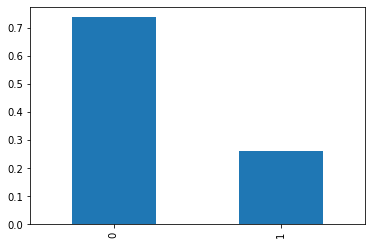

In [17]:
data_train['Churn'].value_counts(normalize=True).plot(kind='bar')

Наблюдается несбалансированность классов

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [18]:
import seaborn as sns

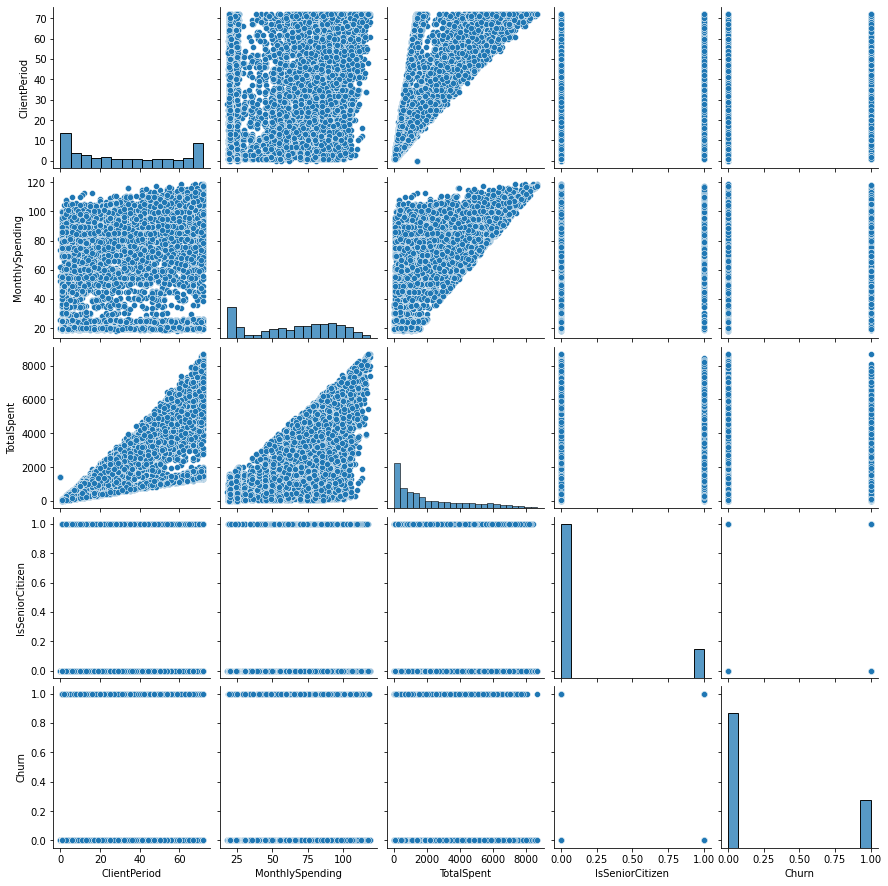

In [19]:
sns.pairplot(data_train)

По некоторым признакам заметна линейная разделимось. Но настараживают графики, где всего 4 точки. Из-за них есть вероятность, что линейные модели без модификаций плохо себя покажут, но это еще предстоить выяснить. 

In [22]:
data_train = data_train.drop(['TotalSpent'], axis=1)
data_test = data_test.drop(['TotalSpent'], axis=1)

# Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Для бустинга не будет кодировать категориальные признаки.

In [24]:
data_train_original = data_train.copy()
data_test_original = data_test.copy()

In [25]:
X_train = data_train.drop(['Churn'], axis=1)
y_train = data_train['Churn']

X_test = data_test

Перейдем к предобработке данных.

In [26]:
ohe_features = X_train.select_dtypes(include='object').columns.to_list()
print(ohe_features)

num_features = X_train.select_dtypes(exclude='object').columns.to_list()
print(num_features)

['Sex', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']
['ClientPeriod', 'MonthlySpending', 'IsSeniorCitizen']


In [27]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
encoder.fit(X_train[ohe_features])

X_train[encoder.get_feature_names_out()] = encoder.transform(X_train[ohe_features])
X_train.drop(ohe_features, axis=1, inplace=True)

X_test[encoder.get_feature_names_out()] = encoder.transform(X_test[ohe_features])
X_test.drop(ohe_features, axis=1, inplace=True)

c:\users\vbadmaev1\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [29]:
X_train.head()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.435476,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.613288,-1.294998,-0.435476,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-1.279005,0.363737,-0.435476,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.016173,0.476418,2.296336,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.124450,1.667856,-0.435476,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


Данные для линейных моделей готовы.

Теперь обучим логистическую регрессию через GridSearchCV.

In [30]:
logreg_params = {'C': [100, 10, 1, 0.1, 0.01, 0.001]}
c_vals = [100, 10, 1, 0.1, 0.01, 0.001]
cv_logreg = GridSearchCV(estimator=LogisticRegression(random_state=777), 
                         param_grid=logreg_params,
                         cv=5,
                         refit=True, 
                         scoring='roc_auc',
                         n_jobs=-1, 
                         verbose=10)

cv_logreg.fit(X_train, y_train)
print('ROC-AUC:', cv_logreg.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
ROC-AUC: 0.8431100751115362


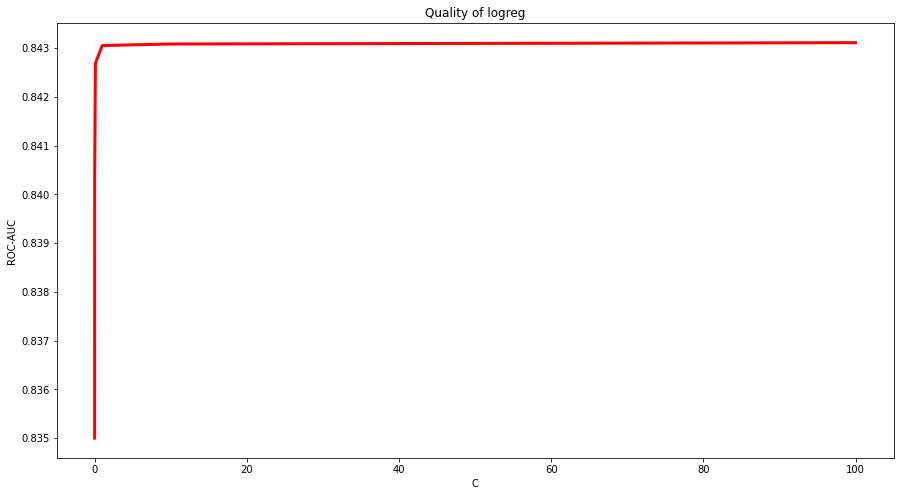

In [31]:
plt.figure(figsize=(15,8))
plt.title('Quality of logreg')
plt.plot(c_vals, cv_logreg.cv_results_['mean_test_score'], label='mean values', color='red', lw=3)
plt.xlabel('C')
plt.ylabel('ROC-AUC')
plt.show()

Теперь добавим взвешивание классов, чтобы бисбаланс учитывался. 

In [32]:
logreg_params = {'C': [100, 10, 1, 0.1, 0.01, 0.001]}
c_vals = [100, 10, 1, 0.1, 0.01, 0.001]
cv_logreg = GridSearchCV(estimator=LogisticRegression(class_weight='balanced', random_state=777), 
                         param_grid=logreg_params,
                         cv=5,
                         refit=True, 
                         scoring='roc_auc',
                         n_jobs=-1, 
                         verbose=10)

cv_logreg.fit(X_train, y_train)
print('ROC-AUC:', cv_logreg.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
ROC-AUC: 0.8427654127216968


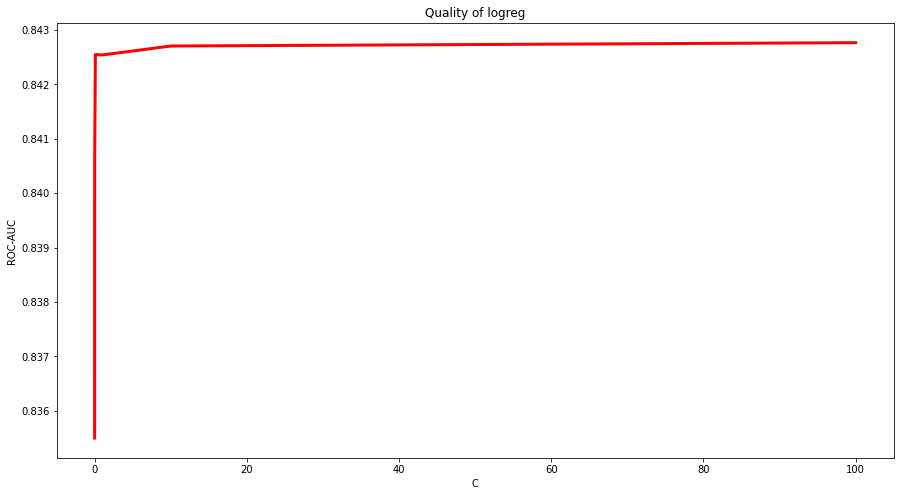

In [33]:
plt.figure(figsize=(15,8))
plt.title('Quality of logreg')
plt.plot(c_vals, cv_logreg.cv_results_['mean_test_score'], label='mean values', color='red', lw=3)
plt.xlabel('C')
plt.ylabel('ROC-AUC')
plt.show()

Лучшее значение ROC-AUC = 0.843 при C = 100.

# Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

Разделим данные на трейн и валидацию

In [41]:
X_train = data_train_original.drop(['Churn'], axis=1)
y_train = data_train_original['Churn']
X_test = data_test_original

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.75, random_state=777, stratify=y_train)
cat_features = X_train.select_dtypes(include='object').columns.to_list()

Протестируем catboost cо стандартными параметрами.

In [43]:
from catboost import CatBoostClassifier

In [44]:
catboost = CatBoostClassifier(cat_features=cat_features, random_seed=777, verbose=False)
catboost.fit(X_train, y_train)

In [45]:
y_train_predicted = catboost.predict_proba(X_train)[:, 1]
y_valid_predicted = catboost.predict_proba(X_valid)[:, 1]

print('ROC-AUC train:', roc_auc_score(y_train, y_train_predicted))
print('ROC-AUC valid:', roc_auc_score(y_valid, y_valid_predicted))

ROC-AUC train: 0.8991614342856464
ROC-AUC valid: 0.839290279897414


Поучили хороший результат

Теперь подберем оптимальные значения количества деревьев и learning_rate'а

In [46]:
best_model = None
best_result = 0
best_lr = 0
best_num_trees = 0

for lr in [0.00001, 0.0001, 0.001, 0.01]:
    for tree in [10, 50, 100, 150, 200, 300]:
        catboost = CatBoostClassifier(learning_rate=lr, num_trees=tree, 
                                      cat_features=cat_features, random_seed=777, 
                                      verbose=False, loss_function='Logloss',
                                      eval_metric='AUC')
        catboost.fit(X_train, y_train)
        y_pred = catboost.predict_proba(X_valid)[:, 1]
        result = roc_auc_score(y_valid, y_valid_predicted)
        if result > best_result:
            best_result = result
            best_model = catboost
            best_lr = lr
            best_num_trees = tree

print('Лучшее значение ROC-AUC на валидации:', best_result)
print('learning_rate:', best_lr)
print('num_trees:', best_num_trees)

Лучшее значение ROC-AUC на валидации: 0.839290279897414
learning_rate: 1e-05
num_trees: 10


Взвесим классы

In [47]:
best_model = None
best_result = 0
best_lr = 0
best_num_trees = 0

for lr in [0.00001, 0.0001, 0.001, 0.01]:
    for tree in [10, 50, 100, 150, 200, 300]:
        catboost = CatBoostClassifier(learning_rate=lr, num_trees=tree, 
                                      cat_features=cat_features, random_seed=777, 
                                      verbose=False, loss_function='Logloss',
                                      eval_metric='AUC', auto_class_weights='Balanced')
        catboost.fit(X_train, y_train)
        y_pred = catboost.predict_proba(X_valid)[:, 1]
        result = roc_auc_score(y_valid, y_valid_predicted)
        if result > best_result:
            best_result = result
            best_model = catboost
            best_lr = lr
            best_num_trees = tree

print('Лучшее значение ROC-AUC на валидации:', best_result)
print('learning_rate:', best_lr)
print('num_trees:', best_num_trees)

Лучшее значение ROC-AUC на валидации: 0.839290279897414
learning_rate: 1e-05
num_trees: 10


Теперь попробуем использовать GridSearch и кросс-валидацию.

In [48]:
X_train = data_train_original.drop(['Churn'], axis=1)
y_train = data_train_original['Churn']
X_test = data_test_original

In [49]:
params = {'learning_rate': [0.0001, 0.001, 0.01],
          #'num_trees': range(5, 100, 10),
          'iterations': [100, 200, 300, 500],
          'depth': [5, 10, 50],
          }

cb_model_2 = CatBoostClassifier(cat_features=cat_features, random_seed=777, 
                              verbose=False, loss_function='Logloss',
                              eval_metric='AUC')
cv_cb_2 = GridSearchCV(estimator=cb_model_2, 
                     param_grid=params,
                     cv=5,
                     refit=True, 
                     scoring='roc_auc',
                     n_jobs=-1, 
                     verbose=False)

cv_cb_2.fit(X_train, y_train)
print('ROC-AUC:', cv_cb_2.best_score_)

c:\users\vbadmaev1\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\vbadmaev1\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\vbadmaev1\appdata\local\programs\python\python39\lib\site-packages\catboost\core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline

ROC-AUC: 0.8474701527029579


In [50]:
params = {'learning_rate': [0.0001, 0.001, 0.01],
          'iterations': [100, 200, 300, 500],
          'depth': [5, 10, 50],
          }

cb_model_3 = CatBoostClassifier(cat_features=cat_features, random_seed=777, 
                              verbose=False, loss_function='Logloss',
                              eval_metric='AUC')


gs_res = cb_model_3.grid_search(params, X_train, y_train, cv=5, refit=True)
print(gs_res['params'])


bestTest = 0.8413294356
bestIteration = 74

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8413294	best: 0.8413294 (0)	total: 1.85s	remaining: 1m 4s

bestTest = 0.8414225802
bestIteration = 69

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8414226	best: 0.8414226 (1)	total: 3.68s	remaining: 1m 2s

bestTest = 0.8653511789
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8653512	best: 0.8653512 (2)	total: 5.47s	remaining: 1m

bestTest = 0.8639707287
bestIteration = 40

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8639707	best: 0.8653512 (2)	total: 9.69s	remaining: 1m 17s

bestTest 

In [51]:
from sklearn.model_selection import cross_val_score

cross_val_score(cb_model_3, X_train, y_train, scoring='roc_auc', cv=5).mean()

0.8474701527029579

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

Лучший результат при кросс-валидации: 0.8474701527029579

Лучший результат на тесте: 0.85048

# Предсказания

In [52]:
best_model = cb_model_3

In [54]:
#X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('submission.csv', index_col='Id')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('my_submission.csv')

Лучшее решение отправьте в Stepik.